In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\KNN\Data  Sets\heart_distance.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df=df.drop_duplicates()

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

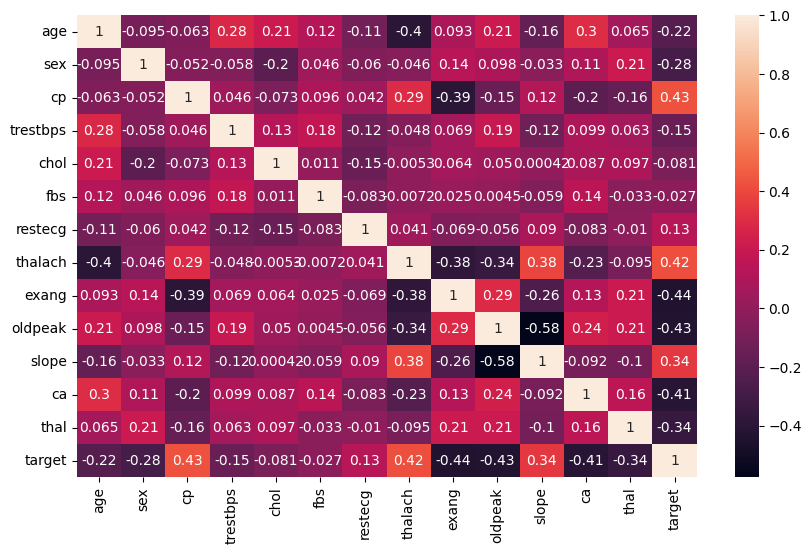

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<Axes: >

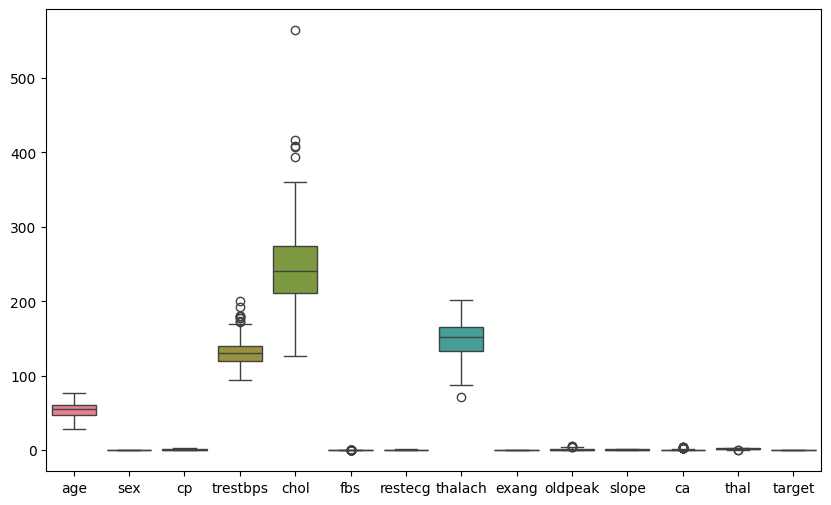

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

<Axes: ylabel='chol'>

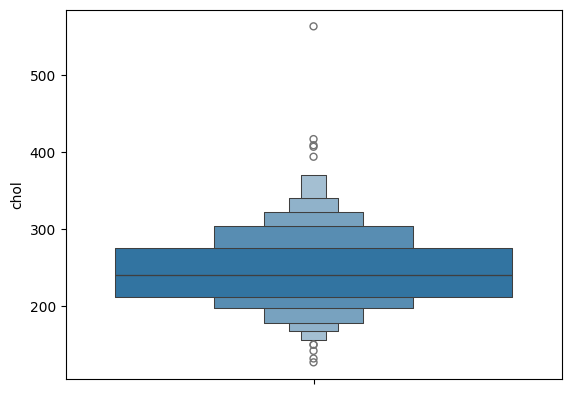

In [38]:
sns.boxenplot(df["chol"])

In [44]:
from feature_engine.outliers import Winsorizer
chol_col=Winsorizer(capping_method="iqr")
df["chol1"]=chol_col.fit_transform(df[["chol"]])

In [48]:
df.drop("chol",axis=1,inplace=True)

In [51]:
df["chol1"]=df["chol1"].astype(int)

In [52]:
df.head(2)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol1
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1,233
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1,250


<Axes: xlabel='chol1'>

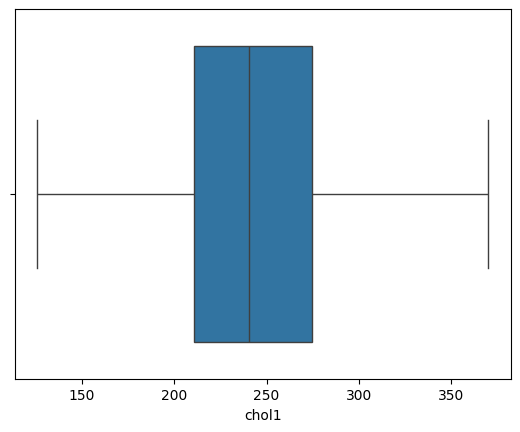

In [55]:
sns.boxplot(x="chol1",data=df)

<Axes: >

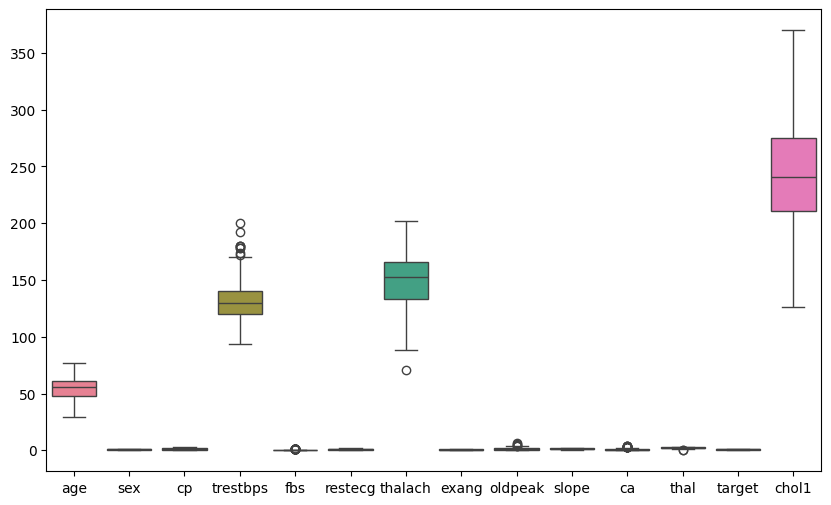

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

In [60]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'chol1'],
      dtype='object')

<Axes: xlabel='trestbps'>

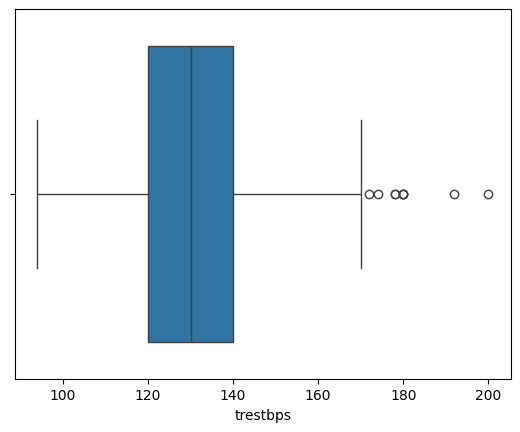

In [59]:
sns.boxplot(x="trestbps",data=df)

In [61]:
df["trestbps"]=chol_col.fit_transform(df[["trestbps"]])

<Axes: xlabel='thalach'>

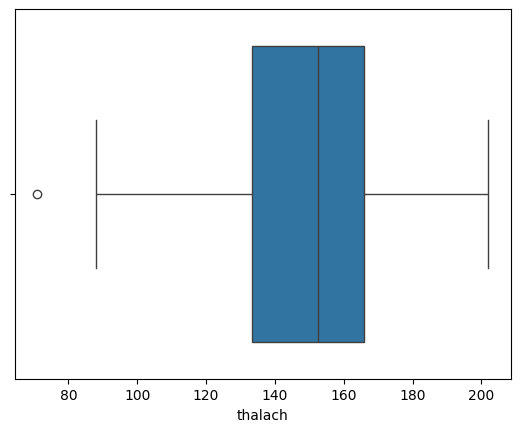

In [76]:
sns.boxplot(x="thalach",data=df)

<Axes: >

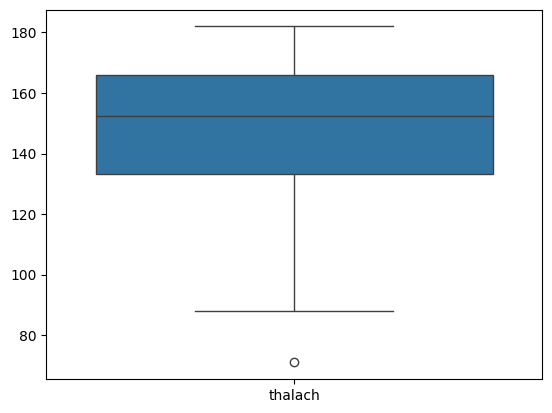

In [106]:
model=Winsorizer(capping_method="iqr",tail="left")
model.fit(df[["thalach"]])
df["thalach1"]=model.transform(df[["thalach"]])
sns.boxplot(df[["thalach"]])

In [64]:
df.head(2)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol1
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1,233
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1,250


<Axes: ylabel='trestbps'>

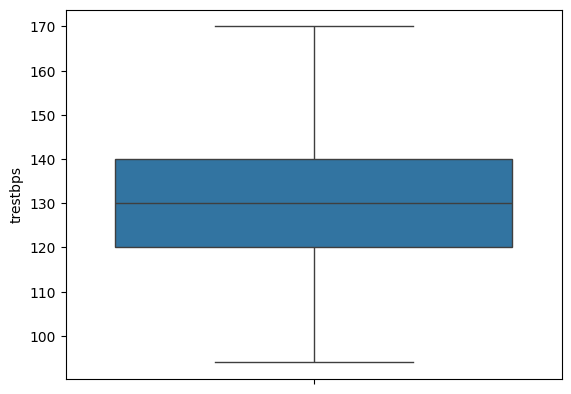

In [62]:
sns.boxplot(df["trestbps"])

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='target', ylabel='count'>

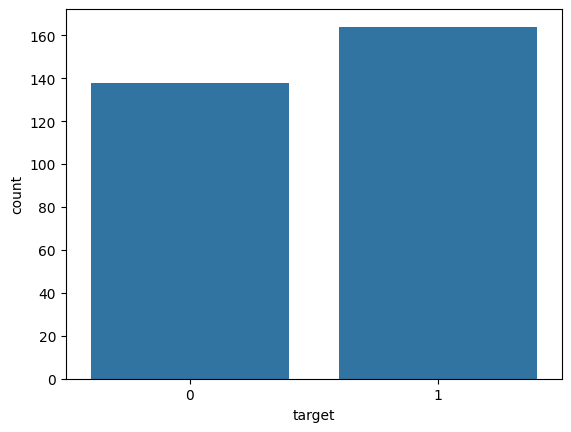

In [16]:
sns.countplot(x="target",data=df)

In [17]:
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal',]]
y=df["target"]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.8)
x_train.shape,x_test.shape

((241, 13), (61, 13))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(p=3,metric=)
model.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.6557377049180327


0.6557377049180327
